# k-means clustering

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [9]:
"""
    >> mask = (clusters == i)
    - clusters is a ndarray of shape (1797,) where each value is from 0 to 9
    - clusters == i gives another ndarray of shape (1797,) where each value is True or False
    - digits.target is ndarray of shape (1797,) where each value is from 0 to 9
    - digits.target[mask] is filtered ndarray, e.g., when i = 3 the length of this array is 98
    - it picks only those indices of digits.target where mask evaluates to True
    - mode(digits.target[mask]) returns an array of size two, the first element is the mode (maximum occuring element) 
       from the digits.target. The second element is the count (frequency of maximum occuring element)
    - labels[mask] is filtered version of labels containing those indices which were assigned cluster i
    e.g. when i = 3, there are 98 such indices
    - the assignment labels[mask] = mode(digits.target[mask])[0] givens all the indices in cluster i 
      the label corresponding to the mode of the digit.target for that cluster
    - ndarray supports such an assignment   
"""
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7902058987200891

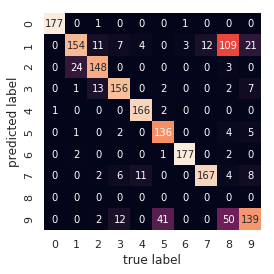

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# k-means with PCA

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

digits_scaled = scaler.fit_transform(digits.data)

from sklearn.decomposition import PCA

"""
    pca can also be initialized as pca = pca(0.95) : fraction of variance explained
"""


from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(digits_scaled)
                    
digits_proj = pd.DataFrame(data = principal_components, 
                           columns = ['pc_1', 'pc_2'])

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.5409015025041736

# t-SNE

In [14]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

# Visualizing t-SNE results

In [15]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


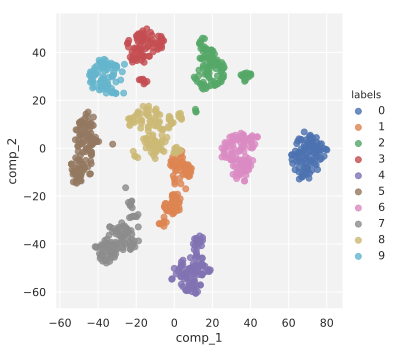

In [19]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(digits_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(1000) ,fit_reg=False)
print("ready")
